In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (114, 4)
X_val (21, 4)
X_test (15, 4)


In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [4]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9523809523809523


In [5]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.9333333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN: 0.9333333333333333


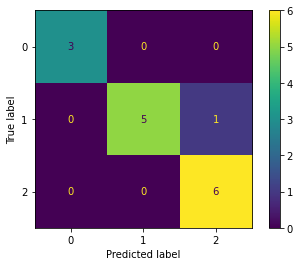

In [6]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [12]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [16]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0594 - acc: 0.9825 - val_loss: 0.1352 - val_acc: 0.9524
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0599 - acc: 0.9912 - val_loss: 0.1375 - val_acc: 0.9524
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0637 - acc: 0.9825 - val_loss: 0.1276 - val_acc: 0.9524
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0621 - acc: 0.9737 - val_loss: 0.1315 - val_acc: 0.9524
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0584 - acc: 0.9825 - val_loss: 0.1364 - val_acc: 0.9524
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0603 - acc: 0.9912 - val_loss: 0.1455 - val_acc: 0.9524
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0627 - acc: 0.9912 - val_loss: 0.1308 - val_acc: 0.9524
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0561 - acc: 0.98

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [18]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)


1/1 [==============================] - 0s 25ms/step - loss: 0.1522 - acc: 0.9333
Akurasi Testing ANN: 0.9333333373069763


In [20]:
import joblib
mlr = model.fit(X_train,Y_train,epochs=10,batch_size=5,validation_data=(X_val,Y_val))
filename = 'model.sav'
joblib.dump(mlr, filename)

Epoch 1/10
23/23 [==============================] - 0s 4ms/step - loss: 0.0534 - acc: 0.9737 - val_loss: 0.1427 - val_acc: 0.9524
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0521 - acc: 0.9825 - val_loss: 0.1431 - val_acc: 0.9524
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0517 - acc: 0.9825 - val_loss: 0.1384 - val_acc: 0.9524
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0525 - acc: 0.9825 - val_loss: 0.1443 - val_acc: 0.9524
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0512 - acc: 0.9825 - val_loss: 0.1342 - val_acc: 0.9524
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0584 - acc: 0.9825 - val_loss: 0.1518 - val_acc: 0.9524
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0490 - acc: 0.9825 - val_loss: 0.1357 - val_acc: 0.9524
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0514 - acc: 0.98

['model.sav']